In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 512 
num_classes = 10
num_epochs = 10
batch_size = 128
learning_rate = 0.001
momentum = 0.5

In [ ]:
#Loading the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',train=True,transform = transforms.ToTensor(),download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',train=False,transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle = False)

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape,labels.shape)
"""
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0],cmap = 'gray')

plt.show()"""

torch.Size([128, 1, 28, 28]) torch.Size([128])


"\nfor i in range(6):\n  plt.subplot(2,3,i+1)\n  plt.imshow(samples[i][0],cmap = 'gray')\n\nplt.show()"

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)
  
  def forward(self, x): #one sample x
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

In [ ]:
model = NeuralNet(input_size, hidden_size, num_classes)

In [ ]:
#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
#optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)  #SGD

In [ ]:
train_losses = []
train_counter = []
test_losses = []

In [ ]:
#training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):

  for i, (images, labels) in enumerate(train_loader): #enumerate function gives the actual index
    images = images.reshape(-1, 28*28)
  
    #forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)
    train_losses.append(loss.item())
    #backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 128 == 0:
      print(f'Train Epoch: {epoch+1}/{num_epochs}, step{i+1}/{n_total_steps}, loss ={loss.item():.4f}')

Train Epoch: 1/10, step128/469, loss =0.1551
Train Epoch: 1/10, step256/469, loss =0.3284
Train Epoch: 1/10, step384/469, loss =0.3133
Train Epoch: 2/10, step128/469, loss =0.1017
Train Epoch: 2/10, step256/469, loss =0.1531
Train Epoch: 2/10, step384/469, loss =0.0836
Train Epoch: 3/10, step128/469, loss =0.0579
Train Epoch: 3/10, step256/469, loss =0.1245
Train Epoch: 3/10, step384/469, loss =0.1484
Train Epoch: 4/10, step128/469, loss =0.0217
Train Epoch: 4/10, step256/469, loss =0.0812
Train Epoch: 4/10, step384/469, loss =0.0642
Train Epoch: 5/10, step128/469, loss =0.0187
Train Epoch: 5/10, step256/469, loss =0.0625
Train Epoch: 5/10, step384/469, loss =0.0286
Train Epoch: 6/10, step128/469, loss =0.0330
Train Epoch: 6/10, step256/469, loss =0.0537
Train Epoch: 6/10, step384/469, loss =0.0561
Train Epoch: 7/10, step128/469, loss =0.0149
Train Epoch: 7/10, step256/469, loss =0.0181
Train Epoch: 7/10, step384/469, loss =0.0084
Train Epoch: 8/10, step128/469, loss =0.0207
Train Epoc

In [ ]:
#For reference
#test
def test(): 
  with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
      images = images.reshape(-1, 28*28)
      outputs = model(images)

      _,predictions = torch.max(outputs, 1) #torch.max function will return the value and the index and we are interested in the actual index
      n_samples += labels.shape[0]
      n_correct += (predictions == labels).sum().item()
  
    acc = 100* n_correct / n_samples
    print(f'Test accuracy = {acc:.4f}')

def train(): 
  with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in train_loader:
      images = images.reshape(-1, 28*28)
      outputs = model(images)

      _,predictions = torch.max(outputs, 1) #torch.max function will return the value and the index and we are interested in the actual index
      n_samples += labels.shape[0]
      n_correct += (predictions == labels).sum().item()
  
    acc = 100* n_correct / n_samples
    print(f'Training accuracy = {acc:.4f}')

train()
test()

Training accuracy = 99.8917
Test accuracy = 98.1300


Text(0.5, 1.0, 'Training set')

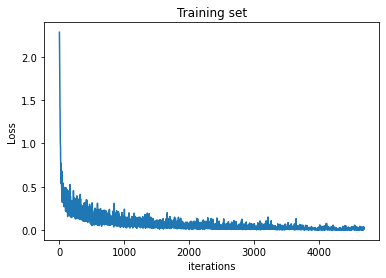

In [ ]:
plt.plot(train_losses)
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.title("Training set")